# Preprocessing Data for scikit-learn


In [2]:
# importing modules
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [46]:
mush = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', 
                  sep = ',', 
                  header = None, 
                  usecols = [0,5,16,17,22], 
                  names = ["Class", "Odor", "VielType", "VielColor", "Habitat"])
mush.head(5)

,Class,Odor,VielType,VielColor,Habitat
0,p,p,p,w,u
1,e,a,p,w,g
2,e,l,p,w,m
3,p,p,p,w,u
4,e,n,p,w,g


> Data is saved and coded in alpahbetic order. In order to analyze the data we need it to convert in numeric value.

In [47]:
# Converting alphabet values to numeric
#Class (edible=3, poisonious =p)
mush.replace(to_replace={"Class":{'e':0, 'p':1}}, inplace=True)
# Odor (almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s)
mush.replace(to_replace={"Odor":{'a':0, 'l':1, 'c':2, 'y':3, 'f':4, 'm':5, 'n':6, 'p':7, 's':8}}, inplace=True)
# Viel Type (partial=p,universal=u)
mush.replace(to_replace={"VielType":{'p':0, 'u':1}},inplace=True)
#Viel Color (brown=n,orange=o,white=w,yellow=y)
mush.replace(to_replace={"VielColor":{'n':0, 'o':1, 'w':2, 'y':3}},inplace=True)
#Habitat (grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d)
mush.replace(to_replace={"Habitat":{'g':0, 'l':1, 'm':2, 'p':3, 'u':4, 'w':5, 'd':6}},inplace=True) 
mush.head(5)

,Class,Odor,VielType,VielColor,Habitat
0,1,7,0,2,4
1,0,0,0,2,0
2,0,1,0,2,2
3,1,7,0,2,4
4,0,6,0,2,0


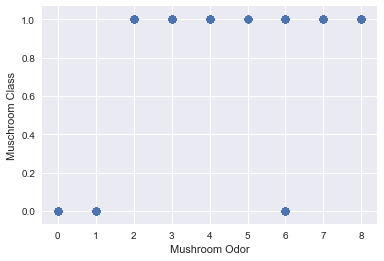

In [48]:
# assigning x & y values
x = mush.Odor
y = mush.Class
# plotting values into scatter plot
plt.scatter(x, y)
plt.xlabel("Mushroom Odor")
plt.ylabel("Muschroom Class")

> Based on the analysis we can say, Mushroom which has **"Almond(0)", "Anise(1) & "None(6)"** odor is edible because they are plotted in** Edible(0)** Mushroom class. But based on **Poisonous(1)** plot, Mushroom which has **no odor(6)** can be poisonous too.

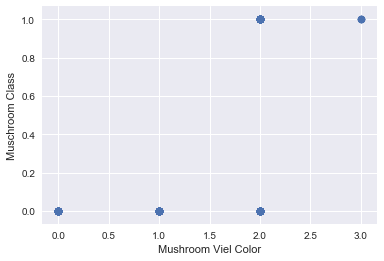

In [67]:
# assigning x & y values
x = mush.VielColor
y = mush.Class
# plotting values into scatter plot
plt.scatter(x, y)
plt.xlabel("Mushroom Viel Color")
plt.ylabel("Muschroom Class")

> Based on the analysis, Mushroom which viel color **"Yellow(3)"**is Poisonous. Viel color **"White(2)"** can be both Poisonous or Edible.

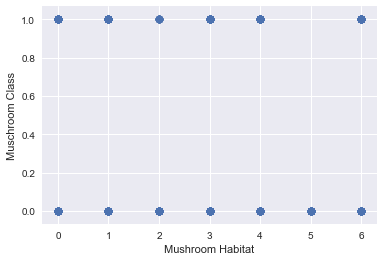

In [68]:
# assigning x & y values
x = mush.Habitat
y = mush.Class
# plotting values into scatter plot
plt.scatter(x, y)
plt.xlabel("Mushroom Habitat")
plt.ylabel("Muschroom Class")

>  Based on the analysis, Mushroom which can be found in **"Waste (5)"** habbitat is Edible and rest habbitat could be edible or poisonous. 

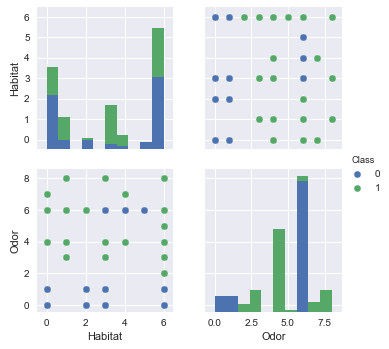

In [69]:
analysis = sns.pairplot(mush, vars=["Habitat", "Odor"], hue="Class")

> Since, Mushroom found in any kinds of habbitat is edible and poisonous, we run another alalysis to narrow down mushroom's class found in habitat based on odor. It seems **"Almond(0) & "Adise(1)"**odor mushroom is edible in  **"grasses(0), meadow(2), paths(3) & woods(6)"** habbitat.